# Plotting phase differences (circular plots)

---

We start by importing the necessary packages:

In [14]:
from thebeat import Sequence
from thebeat.visualization import plot_phase_differences
from thebeat.stats import get_phase_differences
import numpy as np
import pandas as pd

In [15]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', message='Matplotlib ')

## Example 1: Compare random data with isochronous sequence

---

First we take a look at what the behind-the-scenes data looks like, the phase differences themselves, here represented as degrees.

In [16]:
# We create a random number generator with a seed so you get the same output as we.
rng = np.random.default_rng(seed=123)

# Create a random test sequence
test = Sequence.generate_random_normal(n_events=10, mu=500, sigma=50, rng=rng)

# Create an isochronous reference sequence
ref = Sequence.generate_isochronous(n_events=10, ioi=500)

# Get and print the phase differences
phase_diffs = get_phase_differences(seq, ref, unit="degrees")
print(phase_diffs)

[           nan            nan 3.51892015e+02 2.96958521e+02
 3.39876500e+02 3.15717272e+02 3.51726971e+02 3.56634532e+02
 5.17877225e+01 2.80288236e+01 1.68042088e+01 2.89638974e+01
 3.09494938e+02 3.39300110e+02 3.47988039e+01 7.53638485e+01
 1.02535556e+02 9.72803515e+01 1.43428832e+02 1.82093934e+02
 1.96228284e+02 1.96412400e+02 1.83388792e+02 1.39100433e+02
 1.83244688e+02 1.05051108e+02 9.17258035e+01 9.76434860e+01
 1.28599209e+02 1.92019013e+02 2.27778669e+02 2.17283898e+02
 2.43496490e+02 1.98078878e+02 2.49556665e+02 2.43923554e+02
 2.19668224e+02 1.96662061e+02 1.94453053e+02 1.80312796e+02
 2.62749554e+02 2.36895032e+02 2.38068911e+02 2.39078707e+02
 2.40096504e+02 2.42088955e+02 2.24752692e+02 2.03750022e+02
 1.72712244e+02 1.19137958e+02 1.26925004e+02 1.62362552e+02
 1.42811523e+02 1.22701382e+02 1.11308000e+02 9.47249694e+01
 4.30192585e+01 9.21631476e+01 1.07967144e+02 8.23461226e+01
 9.30443060e+01 7.72598442e+01 6.96408966e+01 8.27435945e+01
 1.17050316e+02 1.717531

---

So what does it look like in a circular histogram?

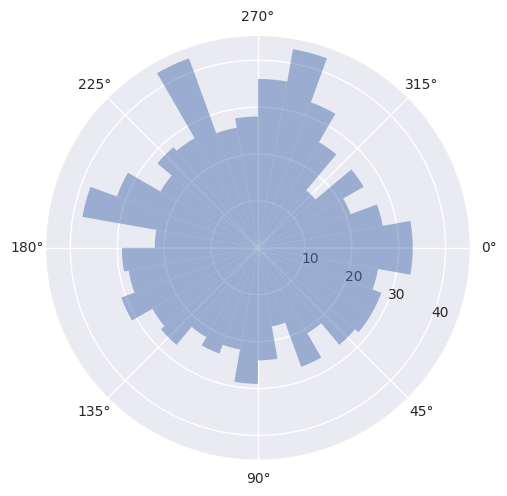

In [17]:
test_seq = Sequence.generate_random_normal(n_events=1000, mu=500, sigma=50, rng=rng)
ref_seq = Sequence.generate_isochronous(n_events=1000, ioi=500)

plot_phase_differences(test_sequence=test_seq, reference_sequence=ref_seq);

## Example 2: Finger-tapping data

---

In [18]:
# Load the dataset
df = pd.read_csv('sampjit_sampledata.csv')

# Take a quick look at the data
print(df.head(5))

FileNotFoundError: [Errno 2] No such file or directory: 'sampjit_sampledata.csv'

---

In [ ]:
stimuli = []
responses = []

# We loop over the sequence id's
for seq_id in df.sequence_id.unique():
    # We get the relevant piece of the dataframe for that sequence id
    df_piece = df.loc[df['sequence_id'] == seq_id]

    # We create a Sequence object for the stimulus and the response
    stimulus = Sequence(iois=df_piece.stim_ioi)
    response = Sequence(iois=df_piece.resp_iti)

    # Add them to the lists
    stimuli.append(stimulus)
    responses.append(response)


Now we're ready to plot. 

/Users/jellevanderwerff/thebeat-package/thebeat/utils.py:203: Warning: thebeat: The first onset of the test sequence was at t=0.
This would result in a phase difference that is always 0, which is not very informative.
Therefore, the first phase difference was discarded.
If you want the first onset at a different time than zero, use the Sequence.from_onsets() method to create the Sequence object.

  warnings.warn(phases_t_at_zero)


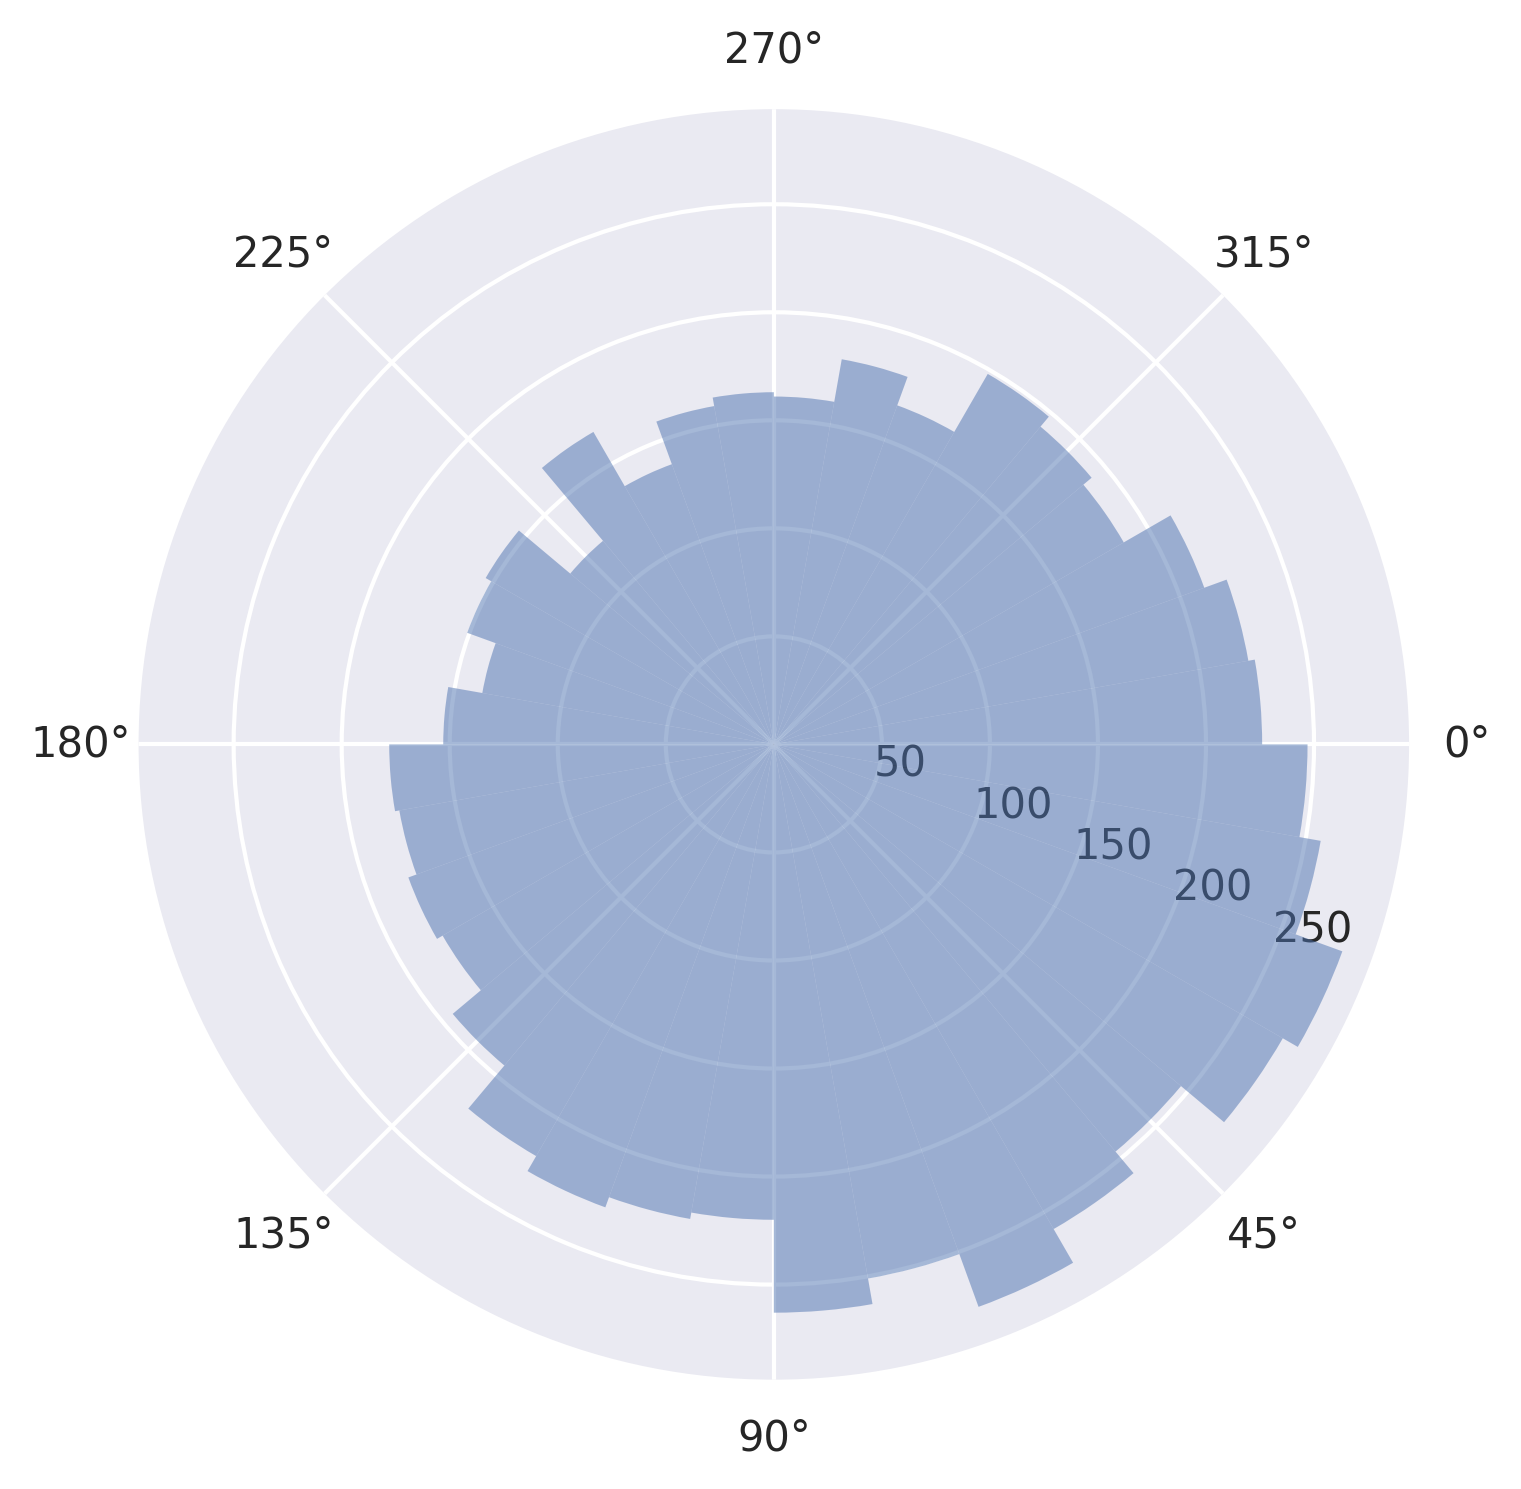

In [ ]:
plot_phase_differences(stimuli, responses, dpi=300);

Say we want to change the x axis labels, we can do that as follows:

/Users/jellevanderwerff/thebeat-package/thebeat/utils.py:203: Warning: thebeat: The first onset of the test sequence was at t=0.
This would result in a phase difference that is always 0, which is not very informative.
Therefore, the first phase difference was discarded.
If you want the first onset at a different time than zero, use the Sequence.from_onsets() method to create the Sequence object.

  warnings.warn(phases_t_at_zero)


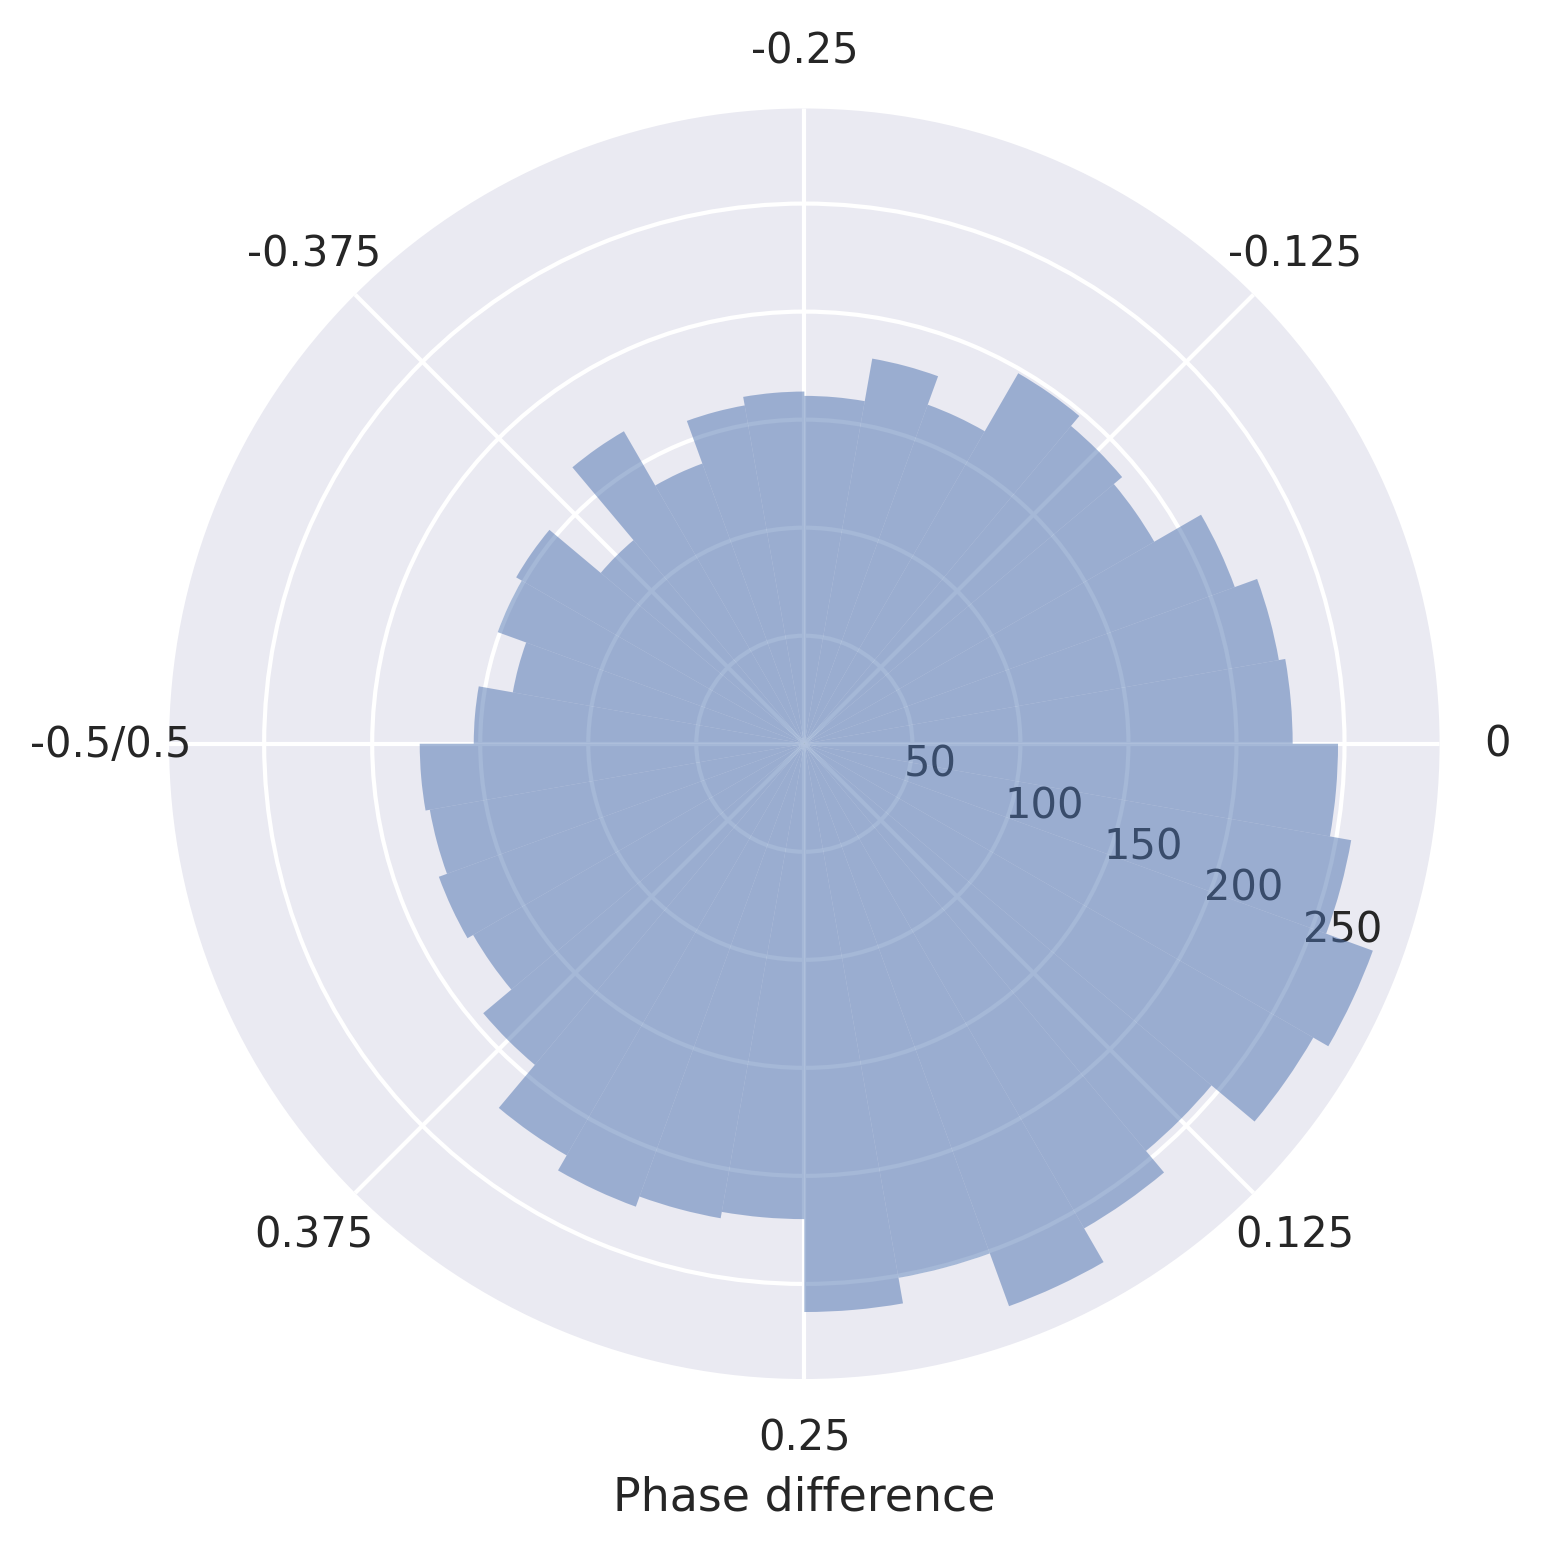

In [ ]:
fig, ax = plot_phase_differences(stimuli, responses, dpi=300)

ax.xaxis.set_ticks(ax.get_xticks())
ax.set_xticklabels([0, 0.125, 0.25, 0.375, '-0.5/0.5', -0.375, -0.25, -0.125])
ax.set_xlabel('Phase difference')

fig.show()

## Adjusting and saving the figure